In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [19]:
# ----- Cấu hình -----
latent_dim = 100       # Kích thước không gian tiềm ẩn
batch_size = 64
lr = 0.0005
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# ----- Dataset -----
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

In [21]:
# ----- Mạng Generator -----
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 28*28),
            nn.Tanh()  # output lung range [-1,1]
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 1, 28, 28)
        return img

# ----- Mạng Discriminator -----
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid()  # output xác suất
        )

    def forward(self, img):
        return self.model(img)

In [22]:
# ----- Khởi tạo mô hình và tối ưu hóa -----
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

[Epoch 1/50]  Loss_D: 0.4216, Loss_G: 1.4565


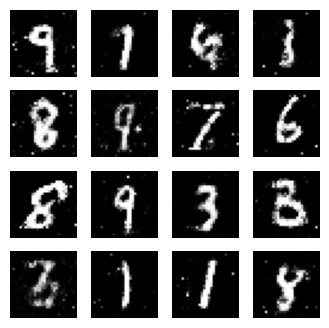

[Epoch 2/50]  Loss_D: 0.4569, Loss_G: 2.1336
[Epoch 3/50]  Loss_D: 0.4031, Loss_G: 1.7019
[Epoch 4/50]  Loss_D: 0.3914, Loss_G: 2.0021
[Epoch 5/50]  Loss_D: 0.6099, Loss_G: 1.0599


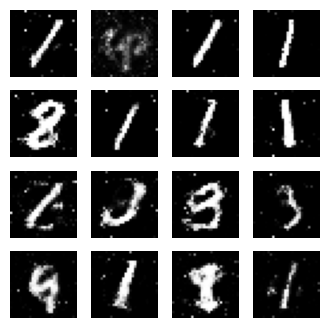

[Epoch 6/50]  Loss_D: 0.3635, Loss_G: 1.6923
[Epoch 7/50]  Loss_D: 0.4816, Loss_G: 1.5707
[Epoch 8/50]  Loss_D: 0.2653, Loss_G: 1.9914
[Epoch 9/50]  Loss_D: 0.3856, Loss_G: 1.5851
[Epoch 10/50]  Loss_D: 0.4477, Loss_G: 1.9081


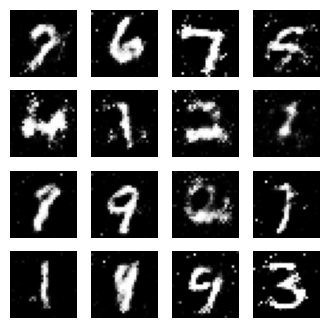

[Epoch 11/50]  Loss_D: 0.4223, Loss_G: 1.8516
[Epoch 12/50]  Loss_D: 0.4759, Loss_G: 1.7890
[Epoch 13/50]  Loss_D: 0.5161, Loss_G: 1.4628
[Epoch 14/50]  Loss_D: 0.4752, Loss_G: 1.9053
[Epoch 15/50]  Loss_D: 0.3785, Loss_G: 1.4712


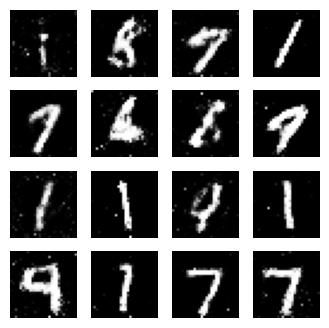

[Epoch 16/50]  Loss_D: 0.7062, Loss_G: 1.5734
[Epoch 17/50]  Loss_D: 0.4222, Loss_G: 1.6760
[Epoch 18/50]  Loss_D: 0.4199, Loss_G: 1.6885
[Epoch 19/50]  Loss_D: 0.4039, Loss_G: 1.8794
[Epoch 20/50]  Loss_D: 0.4030, Loss_G: 1.9998


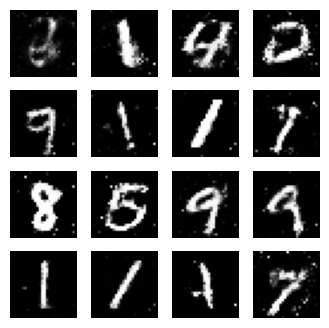

[Epoch 21/50]  Loss_D: 0.4303, Loss_G: 1.5534
[Epoch 22/50]  Loss_D: 0.5893, Loss_G: 1.4174
[Epoch 23/50]  Loss_D: 0.5254, Loss_G: 1.9309
[Epoch 24/50]  Loss_D: 0.5943, Loss_G: 1.5782
[Epoch 25/50]  Loss_D: 0.5559, Loss_G: 1.3744


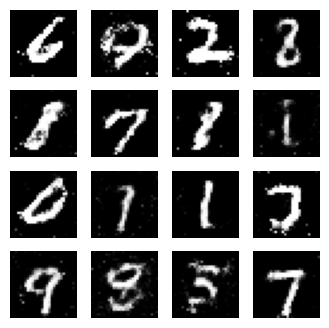

[Epoch 26/50]  Loss_D: 0.4360, Loss_G: 1.6615
[Epoch 27/50]  Loss_D: 0.5547, Loss_G: 1.1969
[Epoch 28/50]  Loss_D: 0.4794, Loss_G: 1.2460
[Epoch 29/50]  Loss_D: 0.6695, Loss_G: 1.2127
[Epoch 30/50]  Loss_D: 0.5059, Loss_G: 1.3124


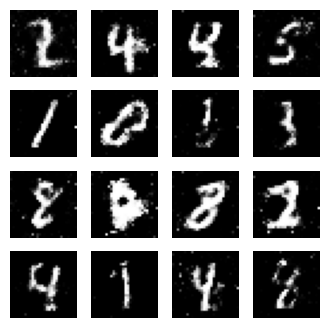

[Epoch 31/50]  Loss_D: 0.4122, Loss_G: 1.7031
[Epoch 32/50]  Loss_D: 0.5355, Loss_G: 1.5130
[Epoch 33/50]  Loss_D: 0.4677, Loss_G: 1.5076
[Epoch 34/50]  Loss_D: 0.5831, Loss_G: 1.4959
[Epoch 35/50]  Loss_D: 0.5363, Loss_G: 1.5629


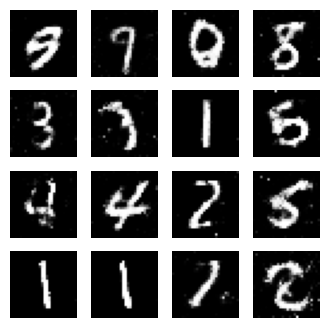

[Epoch 36/50]  Loss_D: 0.7041, Loss_G: 1.3594
[Epoch 37/50]  Loss_D: 0.4853, Loss_G: 1.4967
[Epoch 38/50]  Loss_D: 0.5107, Loss_G: 1.3407
[Epoch 39/50]  Loss_D: 0.7934, Loss_G: 1.1539
[Epoch 40/50]  Loss_D: 0.5035, Loss_G: 1.4396


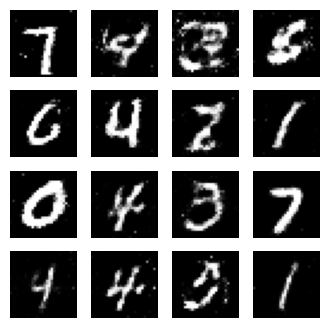

[Epoch 41/50]  Loss_D: 0.4461, Loss_G: 1.4402
[Epoch 42/50]  Loss_D: 0.4801, Loss_G: 1.3943
[Epoch 43/50]  Loss_D: 0.4650, Loss_G: 1.2641
[Epoch 44/50]  Loss_D: 0.5230, Loss_G: 1.2048
[Epoch 45/50]  Loss_D: 0.5478, Loss_G: 1.2769


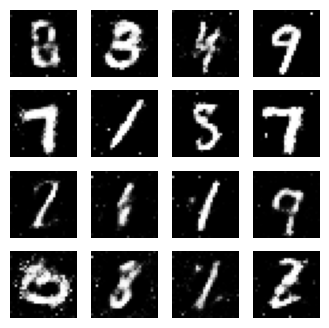

[Epoch 46/50]  Loss_D: 0.6039, Loss_G: 1.3965
[Epoch 47/50]  Loss_D: 0.5328, Loss_G: 1.3709
[Epoch 48/50]  Loss_D: 0.5108, Loss_G: 1.2411
[Epoch 49/50]  Loss_D: 0.6097, Loss_G: 1.3119
[Epoch 50/50]  Loss_D: 0.6047, Loss_G: 1.2902


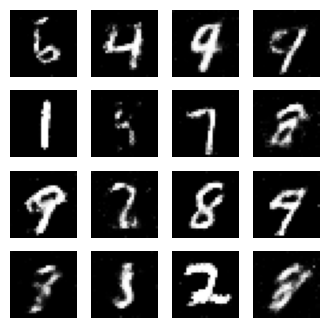

In [24]:
# ----- Training -----
for epoch in range(1, epochs + 1):
    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        batch_size_cur = real_imgs.size(0)

        # Tạo nhãn
        valid = torch.ones(batch_size_cur, 1, device=device)
        fake = torch.zeros(batch_size_cur, 1, device=device)

        # --- 1. Training Discriminator ---
        optimizer_D.zero_grad()
        # Real images
        real_pred = discriminator(real_imgs)
        loss_real = criterion(real_pred, valid)

        # Fake images
        z = torch.randn(batch_size_cur, latent_dim, device=device)
        gen_imgs = generator(z)
        fake_pred = discriminator(gen_imgs.detach())
        loss_fake = criterion(fake_pred, fake)

        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        # --- 2. Training Generator ---
        optimizer_G.zero_grad()
        gen_pred = discriminator(gen_imgs)
        loss_G = criterion(gen_pred, valid)  # Generator muốn phân biệt là thật
        loss_G.backward()
        optimizer_G.step()

    print(f"[Epoch {epoch}/{epochs}]  Loss_D: {loss_D.item():.4f}, Loss_G: {loss_G.item():.4f}")

    # Hiển thị ảnh sinh ra mỗi vài epoch
    if epoch % 5 == 0 or epoch == 1:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim, device=device)
            test_imgs = generator(test_z).cpu()
            fig, axes = plt.subplots(4, 4, figsize=(4, 4))
            for img, ax in zip(test_imgs, axes.flatten()):
                ax.imshow(img.squeeze() * 0.5 + 0.5, cmap='gray')
                ax.axis('off')
            plt.show()
